In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import drive
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report
import seaborn as sns
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Ring_landmarks__norm.csv')

In [ ]:
data
#data = data[['Class', 'Landmark_2_x','Landmark_1_y','Landmark_3_y','Landmark_2_z','Landmark_3_z','Landmark_4_z']]
#data

,Class,Landmark_1_x,Landmark_2_x,Landmark_3_x,Landmark_4_x,Landmark_1_y,Landmark_2_y,Landmark_3_y,Landmark_4_y,Landmark_1_z,Landmark_2_z,Landmark_3_z,Landmark_4_z
0,0,0.0,0.099057,-0.113208,-0.353774,0.0,-0.150943,-0.679245,-1.0,0.0,-0.702014,-0.894759,-0.852863
1,0,0.0,0.150000,-0.068182,-0.286364,0.0,-0.072727,-0.636364,-1.0,0.0,-0.691813,-0.902027,-0.865076
2,0,0.0,0.150000,-0.054545,-0.259091,0.0,-0.036364,-0.636364,-1.0,0.0,-0.632425,-0.804819,-0.740265
3,0,0.0,0.160714,-0.040179,-0.254464,0.0,-0.017857,-0.625000,-1.0,0.0,-0.611806,-0.783072,-0.718515
4,0,0.0,0.184211,-0.013158,-0.223684,0.0,-0.052632,-0.649123,-1.0,0.0,-0.610750,-0.792270,-0.740096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1,0.0,0.028846,0.057692,0.075000,0.0,-0.446154,-0.769231,-1.0,0.0,-0.186568,-0.217719,-0.212872
2396,1,0.0,0.046512,0.075581,0.093023,0.0,-0.418605,-0.767442,-1.0,0.0,-0.196253,-0.227057,-0.218069
2397,1,0.0,0.047244,0.082677,0.100394,0.0,-0.440945,-0.771654,-1.0,0.0,-0.192083,-0.218830,-0.210013
2398,1,0.0,0.040698,0.081395,0.110465,0.0,-0.465116,-0.775194,-1.0,0.0,-0.184321,-0.213198,-0.206850


In [ ]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

In [ ]:
validation_data = (X_val, y_val)
def create_model(batch_size=32, learning_rate=0.01, activation='relu', neurons=32, validation_data=None):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    for i in range(3):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=1000, batch_size=batch_size, validation_data=validation_data, callbacks=[early_stopping], verbose=0)
    best_epoch = early_stopping.stopped_epoch + 1
    return model

In [ ]:
param_grid = {
    'model__neurons' : [64, 96, 128],
    'model__batch_size': [32, 64, 128],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
grid_neural = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_neural_result = grid_neural.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=64; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=   9.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=96; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.01, model__neurons=128; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=64; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=   9.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=96; total time=   8.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.001, model__neurons=128; total time=   9.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time=  36.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time=  35.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time=  28.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=64; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time=  35.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time=  24.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=96; total time=  25.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time=  26.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time=  42.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=32, model__learning_rate=0.0001, model__neurons=128; total time=  27.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=64; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=96; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.01, model__neurons=128; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=64; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=96; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.001, model__neurons=128; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time=  34.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time=  30.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time=  35.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=64; total time=  29.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time=  36.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time=  32.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time=  27.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time=  34.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=96; total time=  30.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time=  18.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time=  22.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=64, model__learning_rate=0.0001, model__neurons=128; total time=  24.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=64; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=96; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.01, model__neurons=128; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=64; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=96; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.001, model__neurons=128; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time=  29.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time=  39.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time=  33.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time=  35.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=64; total time=  30.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time=  26.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time=  26.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=96; total time=  19.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time=  28.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time=  27.5s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time=  35.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END model__batch_size=128, model__learning_rate=0.0001, model__neurons=128; total time=  28.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
df_cv_results = pd.DataFrame(grid_neural_result.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score',
                               'param_model__learning_rate', 'param_model__batch_size', 'param_model__neurons']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,param_model__learning_rate,param_model__batch_size,param_model__neurons
5,1,0.980729,0.001,32,128
6,2,0.971875,0.0001,32,64
4,3,0.970313,0.001,32,96
7,3,0.970313,0.0001,32,96
17,5,0.969792,0.0001,64,128
16,6,0.967187,0.0001,64,96
26,7,0.966667,0.0001,128,128
24,7,0.966667,0.0001,128,64
25,9,0.966146,0.0001,128,96
8,10,0.965625,0.0001,32,128


Text(0.5, 1.0, 'Performance wrt # of batch size and neurons')

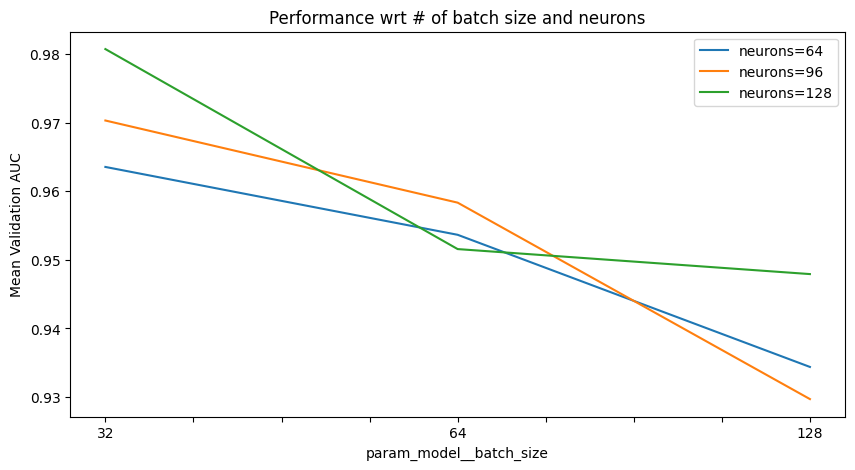

In [ ]:
df_cv_results.sort_values(by='param_model__batch_size', inplace=True)
lr_d64 = df_cv_results.loc[(df_cv_results['param_model__learning_rate']==0.001) & (df_cv_results['param_model__neurons']==64),:]
lr_d96 = df_cv_results.loc[(df_cv_results['param_model__learning_rate']==0.001) & (df_cv_results['param_model__neurons']==96),:]
lr_d128 = df_cv_results.loc[(df_cv_results['param_model__learning_rate']==0.001) & (df_cv_results['param_model__neurons']==128),:]

fig, ax = plt.subplots(figsize=(10,5))
lr_d64.plot(x='param_model__batch_size', y='mean_test_score', label='neurons=64', ax=ax)
lr_d96.plot(x='param_model__batch_size', y='mean_test_score', label='neurons=96', ax=ax)
lr_d128.plot(x='param_model__batch_size', y='mean_test_score', label='neurons=128', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of batch size and neurons')

Text(0.5, 1.0, 'Performance wrt learning rate')

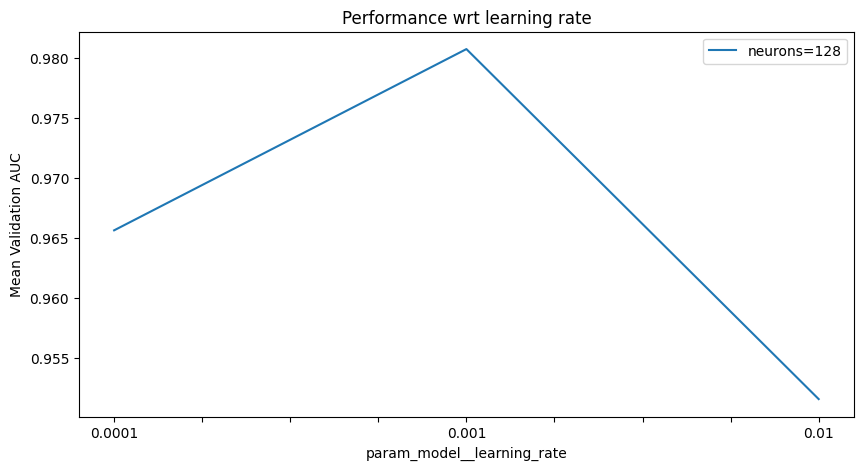

In [ ]:
df_cv_results.sort_values(by='param_model__learning_rate', inplace=True)
lr_t3k_d128 = df_cv_results.loc[(df_cv_results['param_model__batch_size']==32) & (df_cv_results['param_model__neurons']==128),:]
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d128.plot(x='param_model__learning_rate', y='mean_test_score', label='neurons=128', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:
model_neural_fin = tf.keras.models.Sequential()
model_neural_fin.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_neural_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_neural_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_neural_fin.add(tf.keras.layers.Dense(128, activation='relu'))
model_neural_fin.add(tf.keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_neural_fin.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model_neural_fin.fit(X_train, y_train, epochs=1000, batch_size=32, callbacks=[early_stopping], validation_data=(X_val, y_val))
test_loss, test_accuracy = model_neural_fin.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6222 - loss: 0.6570 - val_accuracy: 0.7109 - val_loss: 0.5727
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7532 - loss: 0.5013 - val_accuracy: 0.7969 - val_loss: 0.4557
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7634 - loss: 0.4676 - val_accuracy: 0.7292 - val_loss: 0.5360
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7891 - loss: 0.4601 - val_accuracy: 0.7969 - val_loss: 0.4230
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.3897 - val_accuracy: 0.8229 - val_loss: 0.3838
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8209 - loss: 0.3981 - val_accuracy: 0.8438 - val_loss: 0.3484
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - loss: 0.3545 - val_accuracy: 0.8568 - val_loss: 0.3041
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.3219 - val_accuracy: 0

In [ ]:
y_pred = model_neural_fin.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
auc_score = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

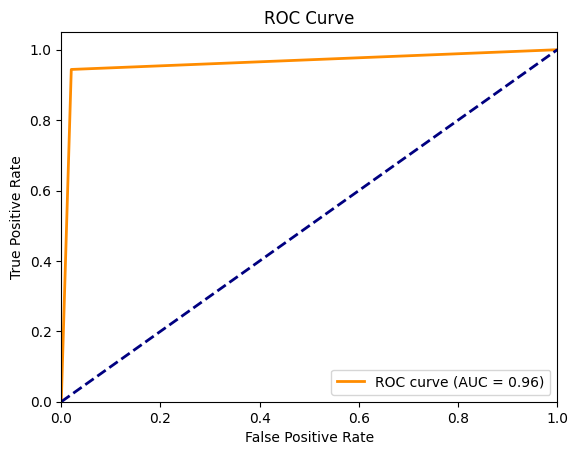

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

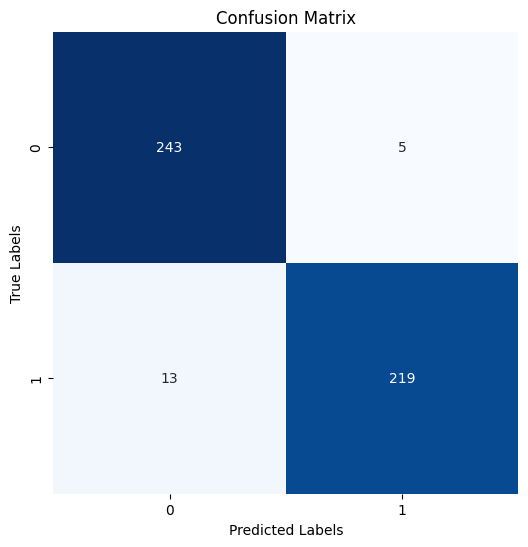

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       248
           1       0.98      0.94      0.96       232

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_classes))

XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
def my_roc_auc_score(model, X, y):
  xg_pred = model.predict(X)
  fpr, tpr, thresholds = roc_curve(y, xg_pred)
  xg_score = auc(fpr, tpr)
  return xg_score

In [ ]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'n_estimators': [100, 600, 1100, 1600, 2100],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
}

In [ ]:
boost_model = GridSearchCV(estimator=XGBClassifier(subsample=0.5,colsample_bytree=0.25,eval_metric='auc',use_label_encoder='False'),param_grid=param_grid,cv=5,scoring=my_roc_auc_score,return_train_score=True,verbose=4)
boost_model.fit(X_train_val,y_train_val)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.964, test=0.948) total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.963, test=0.948) total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.965, test=0.948) total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.958, test=0.958) total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=(train=0.963, test=0.940) total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=0.997, test=0.979) total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=0.997, test=0.982) total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=600;, score=(train=0.996, test=0.963) total time=   0.2s
[CV 4/5] END lear

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 600, 1100, 1600, 2100]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f0d88ab5ab0>, verbose=4)

In [ ]:
df_cv_results = pd.DataFrame(boost_model.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
55,1,0.980231,0.999225,0.5,4,100
17,2,0.980196,0.999484,0.1,8,1100
21,3,0.980185,0.999354,0.1,10,600
19,4,0.979681,0.999484,0.1,8,2100
22,5,0.979672,0.999484,0.1,10,1100
...,...,...,...,...,...,...
103,146,0.966135,0.999613,0.9,2,1600
128,147,0.966118,0.999611,1.1,2,1600
104,148,0.965077,0.999613,0.9,2,2100
129,149,0.964049,0.999611,1.1,2,2100


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

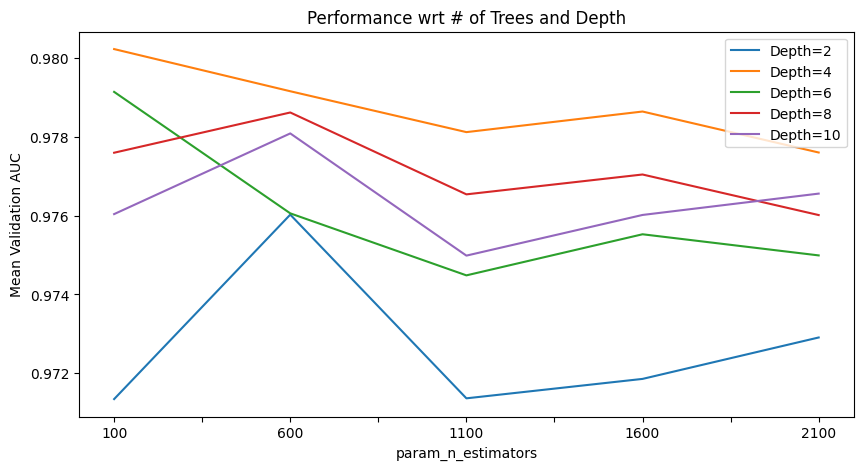

In [ ]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.5) & (df_cv_results['param_max_depth']==2),:]
lr_d4 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.5) & (df_cv_results['param_max_depth']==4),:]
lr_d6 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.5) & (df_cv_results['param_max_depth']==6),:]
lr_d8 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.5) & (df_cv_results['param_max_depth']==8),:]
lr_d10 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.5) & (df_cv_results['param_max_depth']==10),:]
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d4.plot(x='param_n_estimators', y='mean_test_score', label='Depth=4', ax=ax)
lr_d6.plot(x='param_n_estimators', y='mean_test_score', label='Depth=6', ax=ax)
lr_d8.plot(x='param_n_estimators', y='mean_test_score', label='Depth=8', ax=ax)
lr_d10.plot(x='param_n_estimators', y='mean_test_score', label='Depth=10', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

In [ ]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==2),:]
lr_d4 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==4),:]
lr_d6 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==6),:]
lr_d8 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==8),:]
lr_d10 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.1) & (df_cv_results['param_max_depth']==10),:]

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

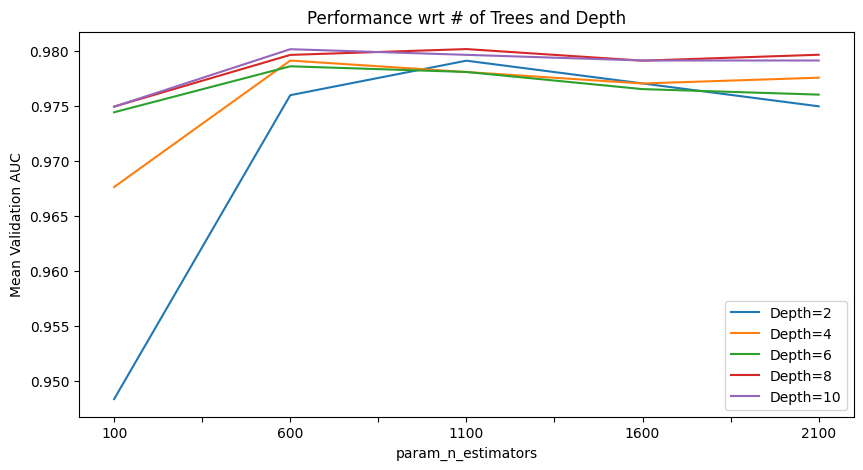

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d4.plot(x='param_n_estimators', y='mean_test_score', label='Depth=4', ax=ax)
lr_d6.plot(x='param_n_estimators', y='mean_test_score', label='Depth=6', ax=ax)
lr_d8.plot(x='param_n_estimators', y='mean_test_score', label='Depth=8', ax=ax)
lr_d10.plot(x='param_n_estimators', y='mean_test_score', label='Depth=10', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

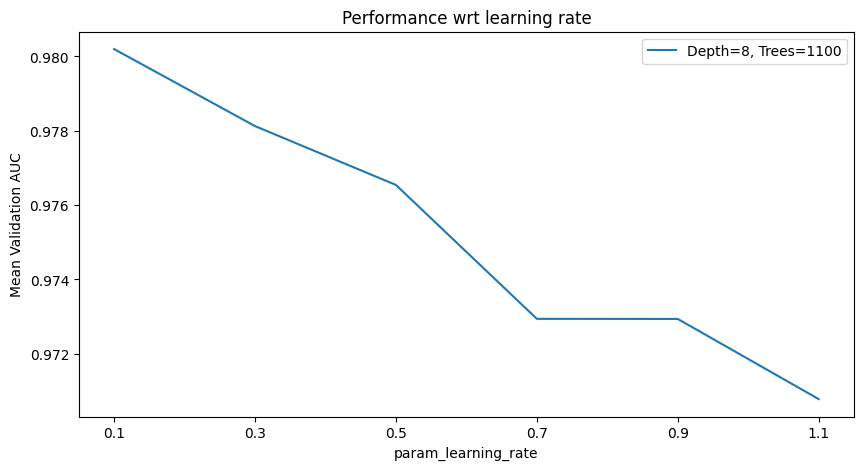

In [ ]:
df_cv_results.sort_values(by='param_learning_rate', inplace=True)
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==1100) & (df_cv_results['param_max_depth']==8),:]
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=8, Trees=1100', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [ ]:
model_xgboost_fin = XGBClassifier(learning_rate=0.1,max_depth=8,n_estimators=1100,subsample=0.5,colsample_bytree=0.25,eval_metric='auc',verbosity=1,use_label_encoder=False)
eval_set = [(X_val, y_val)]
model_xgboost_fin.fit(X_train,y_train,early_stopping_rounds=20,eval_set=eval_set,verbose=True)

[0]	validation_0-auc:0.90467
[1]	validation_0-auc:0.94082


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.96294
[3]	validation_0-auc:0.97933
[4]	validation_0-auc:0.97888
[5]	validation_0-auc:0.98901
[6]	validation_0-auc:0.99032
[7]	validation_0-auc:0.98966
[8]	validation_0-auc:0.99067
[9]	validation_0-auc:0.99051
[10]	validation_0-auc:0.99127
[11]	validation_0-auc:0.99103
[12]	validation_0-auc:0.99133
[13]	validation_0-auc:0.99168
[14]	validation_0-auc:0.99165
[15]	validation_0-auc:0.99198
[16]	validation_0-auc:0.99245
[17]	validation_0-auc:0.99296
[18]	validation_0-auc:0.99321
[19]	validation_0-auc:0.99269
[20]	validation_0-auc:0.99405
[21]	validation_0-auc:0.99397
[22]	validation_0-auc:0.99438
[23]	validation_0-auc:0.99460
[24]	validation_0-auc:0.99487
[25]	validation_0-auc:0.99561
[26]	validation_0-auc:0.99561
[27]	validation_0-auc:0.99572
[28]	validation_0-auc:0.99523
[29]	validation_0-auc:0.99545
[30]	validation_0-auc:0.99553
[31]	validation_0-auc:0.99545
[32]	validation_0-auc:0.99575
[33]	validation_0-auc:0.99591
[34]	validation_0-auc:0.99577
[35]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_fin_pred = model_xgboost_fin.predict(X_test)
y_fin_pred = np.round(y_fin_pred).astype(int)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_fin_pred)
auc_xg_score = auc(fpr, tpr)

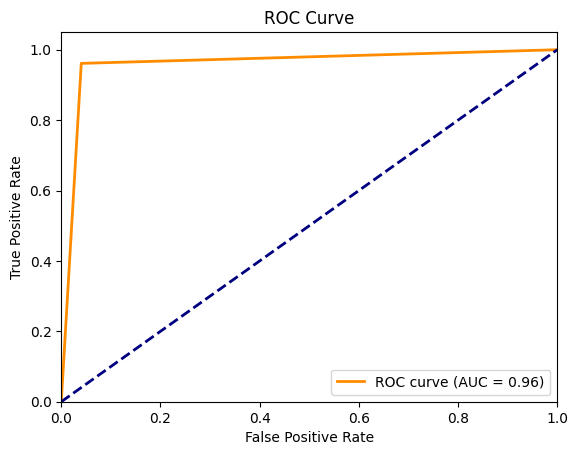

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_xg_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
conf_xgb_matrix = confusion_matrix(y_test,y_fin_pred)

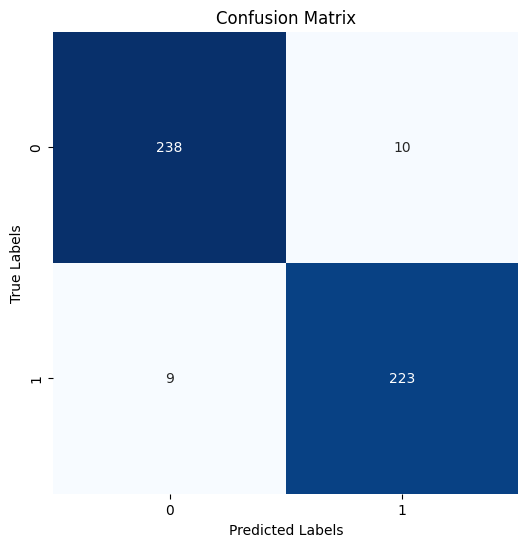

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       248
           1       0.96      0.96      0.96       232

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_xgb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,y_fin_pred))

Random Forest

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=5ef10f0791dd30e03821ad11de071702bc25856adcae868df722c3773276cf61
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tpot import TPOTClassifier

In [ ]:
params_grid = {
    'n_estimators': [100,200,300,400,500,600],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10, 12, 14, 16],
    'min_samples_split': [0.001,0.006,0.011,0.016,0.021,0.026],
    'min_samples_leaf': [0.001,0.006,0.011,0.016,0.021,0.026],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': params_grid},
                                 cv = 5, scoring = 'accuracy')
tpot_classifier.fit(X_train_val,y_train_val)

Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9822916666666666

Generation 2 - Current best internal CV score: 0.9822916666666666

Generation 3 - Current best internal CV score: 0.9822916666666666

Generation 4 - Current best internal CV score: 0.9833333333333334

Generation 5 - Current best internal CV score: 0.9838541666666666

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=500)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': [8,
                                                                                      10,
                                                                                      12,
                                                                                      14,
                                                                                      16],
                                                                        'max_features': ['sqrt',
                                                                                         'log2'],
                                                                        'min_samples_leaf': [0.001,
                                                                                             0.006,
                                                                                             0.011,
                                                                                             0.016,
                                                                                             0.021,
                                                                                             0.026],
                                                                        'min_samples_split': [0.001,
                                                                                              0.006,
                                                                                              0.011,
                                                                                              0.016,
                                                                                              0.021,
                                                                                              0.026],
                                                                        'n_estimators': [100,
                                                                                         200,
                                                                                         300,
                                                                                         400,
                                                                                         500,
                                                                                         600]}},
               early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [ ]:
params_grid = {
    'n_estimators': [100,200,300,400,500,600],
    'criterion': ['gini'],
    'max_depth': [10,12,14,16],
    'min_samples_split': [0.001, 0.006, 0.011],
    'min_samples_leaf': [0.001, 0.006, 0.011],
    'max_features': ['sqrt']
}

In [ ]:
model_GridRF = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),param_grid=params_grid,cv=5,scoring=my_roc_auc_score,return_train_score=True,verbose=2)
model_GridRF.fit(X_train_val,y_train_val)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=100; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=0.001, min_samples_split=0.001, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 12, 14, 16],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [0.001, 0.006, 0.011],
                         'min_samples_split': [0.001, 0.006, 0.011],
                         'n_estimators': [100, 200, 300, 400, 500, 600]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f0d88ab5ab0>, verbose=2)

In [ ]:
df_cv_results = pd.DataFrame(model_GridRF.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                           'param_n_estimators', 'param_min_samples_split','param_min_samples_leaf',
                           'param_max_features', 'param_max_depth','param_criterion']]
df_cv_results.sort_values('rank_test_score', inplace=True)
df_cv_results[:20]

,rank_test_score,mean_test_score,mean_train_score,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion
111,1,0.984349,0.996625,400,0.001,0.001,sqrt,14,gini
110,2,0.983850,0.997015,300,0.001,0.001,sqrt,14,gini
112,3,0.983837,0.996883,500,0.001,0.001,sqrt,14,gini
57,4,0.983834,0.996754,400,0.001,0.001,sqrt,12,gini
166,5,0.983831,0.997013,500,0.001,0.001,sqrt,16,gini
109,6,0.983316,0.997531,200,0.001,0.001,sqrt,14,gini
167,7,0.983313,0.997142,600,0.001,0.001,sqrt,16,gini
58,7,0.983313,0.996884,500,0.001,0.001,sqrt,12,gini
4,9,0.983308,0.996494,500,0.001,0.001,sqrt,10,gini
162,10,0.982809,0.997277,100,0.001,0.001,sqrt,16,gini


In [ ]:
df_cv_results.sort_values(by='param_n_estimators', inplace=True)
lr_d10 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==10),:]
lr_d12 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==12),:]
lr_d14 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==14),:]
lr_d16 = df_cv_results.loc[(df_cv_results['param_min_samples_split']==0.001) & (df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==16),:]

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

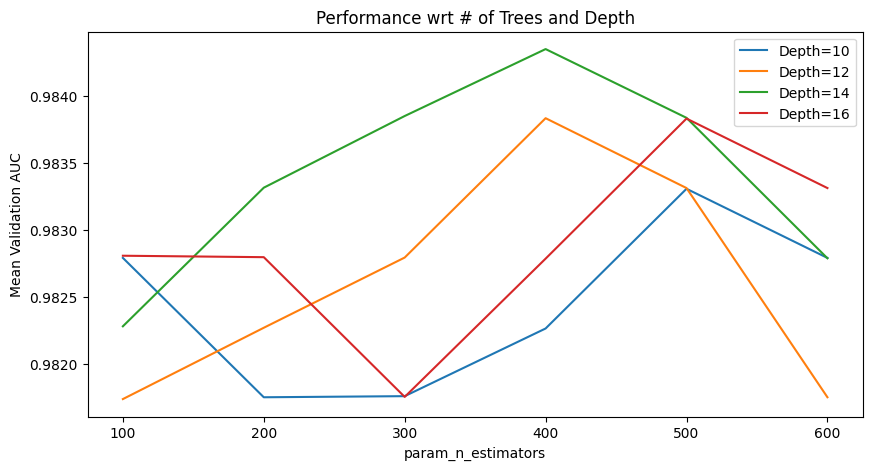

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
lr_d10.plot(x='param_n_estimators', y='mean_test_score', label='Depth=10', ax=ax)
lr_d12.plot(x='param_n_estimators', y='mean_test_score', label='Depth=12', ax=ax)
lr_d14.plot(x='param_n_estimators', y='mean_test_score', label='Depth=14', ax=ax)
lr_d16.plot(x='param_n_estimators', y='mean_test_score', label='Depth=16', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

In [ ]:
df_cv_results.sort_values(by='param_min_samples_split', inplace=True)
lr_d01 = df_cv_results.loc[(df_cv_results['param_min_samples_leaf']==0.001) & (df_cv_results['param_n_estimators']==400) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==14),:]
lr_d06 = df_cv_results.loc[(df_cv_results['param_min_samples_leaf']==0.006) & (df_cv_results['param_n_estimators']==400) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==14),:]
lr_d11 = df_cv_results.loc[(df_cv_results['param_min_samples_leaf']==0.011) & (df_cv_results['param_n_estimators']==400) & (df_cv_results['param_max_features']=='sqrt') & (df_cv_results['param_criterion']=='gini') & (df_cv_results['param_max_depth']==14),:]

Text(0.5, 1.0, 'Performance with difference split and leaf')

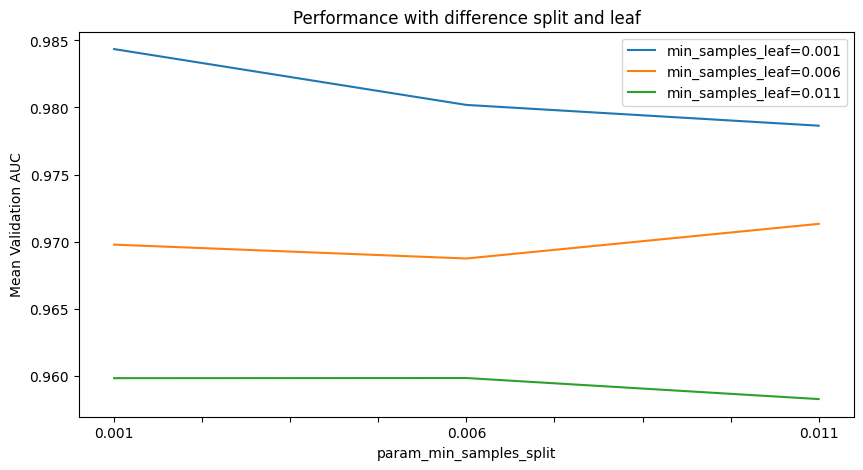

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
lr_d01.plot(x='param_min_samples_split', y='mean_test_score', label='min_samples_leaf=0.001', ax=ax)
lr_d06.plot(x='param_min_samples_split', y='mean_test_score', label='min_samples_leaf=0.006', ax=ax)
lr_d11.plot(x='param_min_samples_split', y='mean_test_score', label='min_samples_leaf=0.011', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance with difference split and leaf')

In [ ]:
model_RF_fin = RandomForestClassifier(max_depth=14,n_estimators=400,min_samples_split=0.001,min_samples_leaf=0.001,max_features='sqrt',criterion='gini')
model_RF_fin.fit(X_train_val, y_train_val)

RandomForestClassifier(max_depth=14, min_samples_leaf=0.001,
                       min_samples_split=0.001, n_estimators=400)

In [ ]:
y_fin_pred = model_RF_fin.predict(X_test)
y_fin_pred = np.round(y_fin_pred).astype(int)

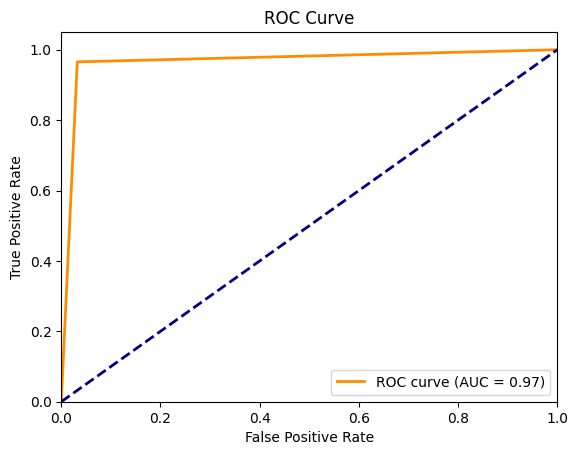

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_fin_pred)
auc_xg_score = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_xg_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

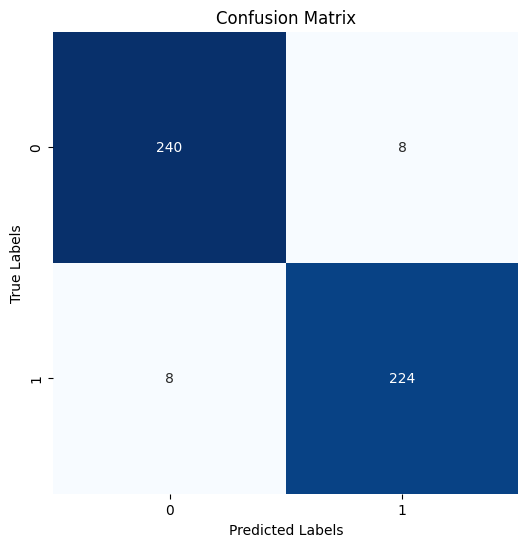

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       248
           1       0.97      0.97      0.97       232

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



In [ ]:
conf_xgb_matrix = confusion_matrix(y_test,y_fin_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_xgb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,y_fin_pred))

In [ ]:
model_RF_fin = RandomForestClassifier(max_depth=14,n_estimators=400,min_samples_split=0.001,min_samples_leaf=0.001,max_features='sqrt',criterion='gini')
model_RF_fin.fit(X, Y)

RandomForestClassifier(max_depth=14, min_samples_leaf=0.001,
                       min_samples_split=0.001, n_estimators=400)

In [ ]:
X_fin_test = pd.read_csv('/content/drive/MyDrive/Ring_test_norm.csv')
y_fin_test = pd.read_csv('/content/drive/MyDrive/Ring_test_class.csv')

In [ ]:
y_fin_pred_test = model_RF_fin.predict(X_fin_test)

In [ ]:
y_fin_pred_test[720:810]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

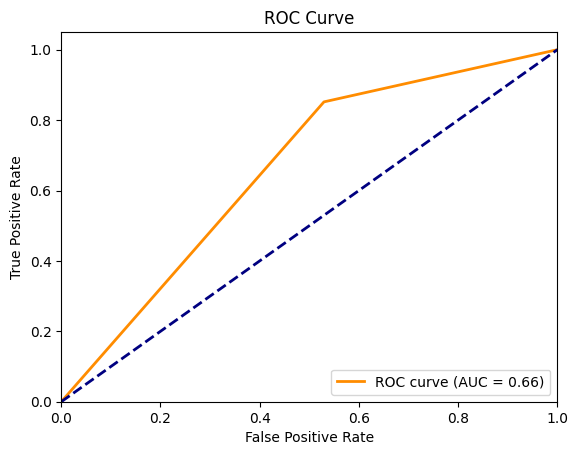

In [ ]:
fpr, tpr, thresholds = roc_curve(y_fin_test,y_fin_pred_test)
auc_xg_score = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_xg_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

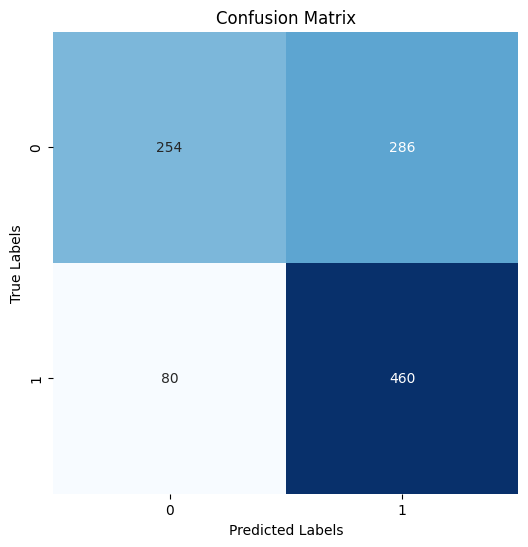

              precision    recall  f1-score   support

           0       0.76      0.47      0.58       540
           1       0.62      0.85      0.72       540

    accuracy                           0.66      1080
   macro avg       0.69      0.66      0.65      1080
weighted avg       0.69      0.66      0.65      1080



In [ ]:
conf_xgb_matrix = confusion_matrix(y_fin_test,y_fin_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_xgb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_fin_test,y_fin_pred_test))

In [ ]:
New_data = pd.read_csv('/content/drive/MyDrive/Ring_landmarks_finetune_norm.csv')

In [ ]:
X_new = New_data.drop('Class', axis=1)
y_new = New_data['Class']
X_combined = pd.concat([X_train_val[1800:], X_new[:1200]])
y_combined = pd.concat([y_train_val[1800:], y_new[:1200]])

In [ ]:
X_new

,Landmark_1_x,Landmark_2_x,Landmark_3_x,Landmark_4_x,Landmark_1_y,Landmark_2_y,Landmark_3_y,Landmark_4_y,Landmark_1_z,Landmark_2_z,Landmark_3_z,Landmark_4_z
0,0.0,-0.098039,-0.529412,-0.833333,0.0,-0.441176,-0.823529,-1.0,0.0,-0.412013,-0.390673,-0.262246
1,0.0,-0.222222,-0.601852,-0.851852,0.0,-0.481481,-0.805556,-1.0,0.0,-0.377311,-0.345316,-0.207311
2,0.0,-0.212963,-0.611111,-0.851852,0.0,-0.472222,-0.814815,-1.0,0.0,-0.390865,-0.363723,-0.231725
3,0.0,-0.227273,-0.618182,-0.854545,0.0,-0.463636,-0.809091,-1.0,0.0,-0.390519,-0.373752,-0.248401
4,0.0,-0.198198,-0.594595,-0.837838,0.0,-0.441441,-0.801802,-1.0,0.0,-0.433645,-0.419593,-0.290988
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,0.0,0.007576,-0.068182,-0.106061,0.0,-0.469697,-0.810606,-1.0,0.0,-0.257920,-0.257894,-0.233807
1195,0.0,0.007519,-0.075188,-0.112782,0.0,-0.473684,-0.812030,-1.0,0.0,-0.254555,-0.256503,-0.234361
1196,0.0,0.000000,-0.069767,-0.108527,0.0,-0.472868,-0.813953,-1.0,0.0,-0.262429,-0.263602,-0.235242
1197,0.0,0.000000,-0.077519,-0.116279,0.0,-0.480620,-0.813953,-1.0,0.0,-0.265939,-0.264251,-0.233655


In [ ]:
model_RF_fin = RandomForestClassifier(max_depth=14,n_estimators=400,min_samples_split=0.001,min_samples_leaf=0.001,max_features='sqrt',criterion='gini')
model_RF_fin.fit(X_combined, y_combined)

RandomForestClassifier(max_depth=14, min_samples_leaf=0.001,
                       min_samples_split=0.001, n_estimators=400)

In [ ]:
y_fin_pred_test = model_RF_fin.predict(X_fin_test)

In [ ]:
y_fin_pred_test

array([1, 1, 1, ..., 0, 1, 1])

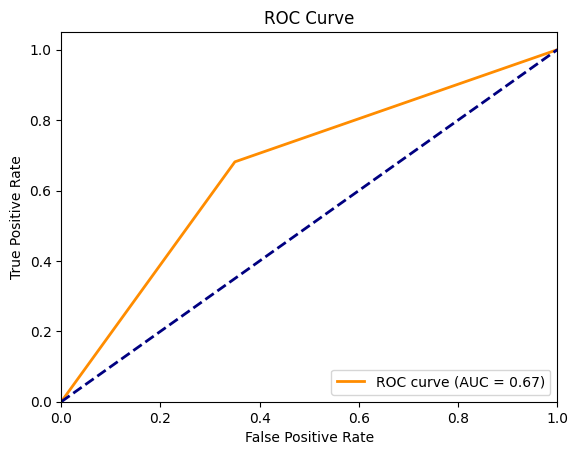

In [ ]:
fpr, tpr, thresholds = roc_curve(y_fin_test,y_fin_pred_test)
auc_xg_score = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_xg_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

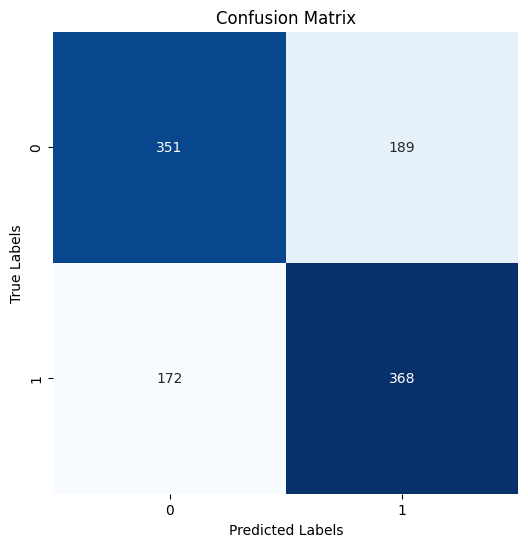

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       540
           1       0.66      0.68      0.67       540

    accuracy                           0.67      1080
   macro avg       0.67      0.67      0.67      1080
weighted avg       0.67      0.67      0.67      1080



In [ ]:
conf_xgb_matrix = confusion_matrix(y_fin_test,y_fin_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_xgb_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_fin_test,y_fin_pred_test))